<a href="https://colab.research.google.com/github/IntroComputationalPhysics-UNT/connecting-to-github-classroom-ananyasahni/blob/main/rigid_pendulum_assignment_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Plotting solutions to the rigid pendulum problem

In this assignment, we explore the solution to the undriven rigid pendulum using: the Euler code we wrote in class, and the `scipy.integrate` package.

In this assignemnt, please use $\omega_0 = 1$ and $I=1$, and $0\le t \le 100$.

----

**Additional information:**

We will use two different initial conditions:
* $\theta = \pi$ and $\frac{d\theta}{dt} = 0$, and
* $\theta = 0$ and $\frac{d\theta}{dt} = 2$.

**Temporal evolution of $\theta$:** for plots of $\theta$ versus $t$, include the following plotting options:
* `plt.figure(figsize=(10,2))`
* `plt.xlim([0, 100]) # time`
* `plt.ylim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5]) # theta`
* Add axes labels and a legend

**Phase portraits:** for plots of $d\theta/dt$ versus $\theta$, include the following plotting options:
* `plt.figure(figsize=(12,3))`
* `plt.xlim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5]) # theta`
* `plt.ylim([-  np.pi - 0.5,  np.pi + 0.5]) # angular velocity`
* Add axes labels and a legend

**Constant energy curves:** for contour plots of the energy, include the following plotting options:
* `plt.figure(figsize=(11,3))`
* `plt.xlim([- 5 * np.pi - 0.5, 5 * np.pi + 0.5]) # theta`
* `plt.ylim([-  np.pi - 0.5,  np.pi + 0.5]) # angular velocity`
* Add axes labels and a legend


## **Problem 1:**

Apply the Euler code we wrote in class to the rigid pendulum defined by $\ddot{\theta} + \omega_0^2 sin(\theta)=0$.

1. **[Text cell]:** Create a text cell with organized pseudocode.
2. **[Code cell(s)]:** For `theta_0 = math.pi`, and `ang_vel_0 = 0`, plot the temporal evolution of $\theta$.
3. **[Code cell(s)]:** For `theta_0 = 0`, and `ang_vel_0 = 2`, plot the temporal evolution of $\theta$ **_and_** the phase portrait.
4. **[Text cell]:** You will need to compare the simple Euler and symplectic/semi-implicit Euler methods and adjust mesh density to find sensible results. Explain your choice.



1. Define constants:  
    $\omega_0 = 1$, $T = 100$, step size $\Delta t$

2. Define equations of motion:  
   $\dot{\theta} = \omega$  
    $\dot{\omega} = -\omega_0^2 \sin(\theta)$  

3. Initialize:  
    $\theta(0) = \theta_0$, $\omega(0) = \dot{\theta}(0)$

4. Update with **Euler or symplectic Euler**:  
    Explicit Euler:  
     $\theta_{n+1} = \theta_n + \Delta t \, \omega_n$  
     $\omega_{n+1} = \omega_n + \Delta t \, (-\omega_0^2 \sin(\theta_n))$  
    Symplectic Euler:  
     $\omega_{n+1} = \omega_n + \Delta t \, (-\omega_0^2 \sin(\theta_n))$  
     $\theta_{n+1} = \theta_n + \Delta t \, \omega_{n+1}$  

5. Iterate until $t = T$ and store results.

6. Plot:  
    Case 1 ($\theta_0 = \pi$, $\dot{\theta}(0) = 0$): plot $\theta(t)$  
    Case 2 ($\theta_0 = 0$, $\dot{\theta}(0) = 2$): plot $\theta(t)$ and phase portrait ($\omega$ vs. $\theta$)


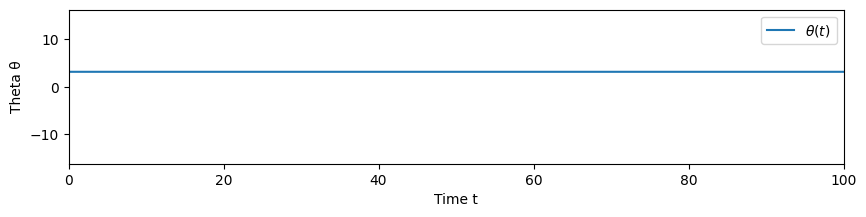

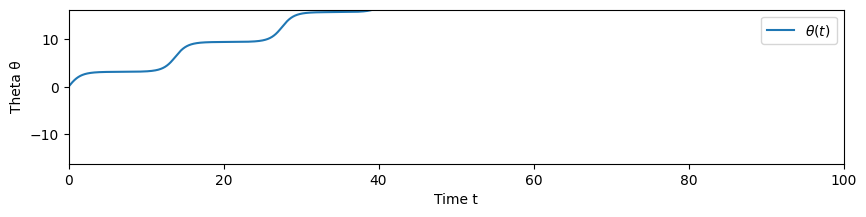

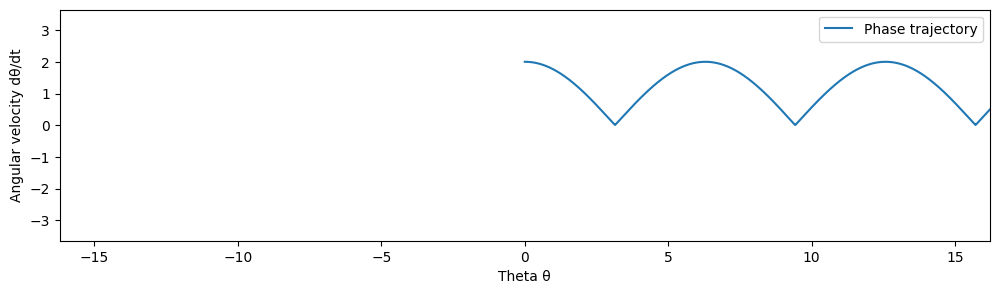

In [ ]:
#case 1
import numpy as np
import matplotlib.pyplot as plt
import math

omega0 = 1.0
T = 100
dt = 0.01
N = int(T/dt)

theta0 = math.pi
omega_init = 0.0

t = np.linspace(0, T, N+1)
theta = np.zeros(N+1)
omega = np.zeros(N+1)

theta[0] = theta0
omega[0] = omega_init

for i in range(N):
    acc = -omega0**2 * np.sin(theta[i])
    omega[i+1] = omega[i] + dt * acc
    theta[i+1] = theta[i] + dt * omega[i+1]

plt.figure(figsize=(10,2))
plt.plot(t, theta, label=r'$\theta(t)$')
plt.xlim([0, 100])
plt.ylim([-5*np.pi-0.5, 5*np.pi+0.5])
plt.xlabel("Time t")
plt.ylabel("Theta θ")
plt.legend()
plt.show()

#case 2
theta0 = 0.0
omega_init = 2.0

theta = np.zeros(N+1)
omega = np.zeros(N+1)

theta[0] = theta0
omega[0] = omega_init

for i in range(N):
    acc = -omega0**2 * np.sin(theta[i])
    omega[i+1] = omega[i] + dt * acc
    theta[i+1] = theta[i] + dt * omega[i+1]

plt.figure(figsize=(10,2))
plt.plot(t, theta, label=r'$\theta(t)$')
plt.xlim([0, 100])
plt.ylim([-5*np.pi-0.5, 5*np.pi+0.5])
plt.xlabel("Time t")
plt.ylabel("Theta θ")
plt.legend()
plt.show()

plt.figure(figsize=(12,3))
plt.plot(theta, omega, label="Phase trajectory")
plt.xlim([-5*np.pi-0.5, 5*np.pi+0.5])
plt.ylim([-np.pi-0.5, np.pi+0.5])
plt.xlabel("Theta θ")
plt.ylabel("Angular velocity dθ/dt")
plt.legend()
plt.show()


## **Problem 2:**

Use `scipy.integrate` and `solve_ivp` to solve the same problem. You'll need to settle on a solver and on tolerances to get physically meaningful results.

1. **[Text cell]:** Include a text cell with organized pseudocode.
2. **[Code cell(s)]:** For `theta_0 = math.pi`, and `ang_vel_0 = 0`, plot the temporal evolution of $\theta$.
3. **[Code cell(s)]:** For `theta_0 = 0`, and `ang_vel_0 = 2`, plot the temporal evolution of $\theta$ **_and_** the phase portrait.
4. **[Text cell]:** You will need to choose a solver and tolerances to see sensible results. Use `help(solve_ivp)` or `solve_ivp?` to explore these options. Explain your choice.




1. Define constants:  
   $\omega_0 = 1$  
   $T = 100$

2. Define the system of equations:  
   Let $y = [\theta, \dot{\theta}]$  
    $\dot{\theta} = \omega$  
    $\dot{\omega} = -\omega_0^2 \sin(\theta)$  

3. Write a function `pendulum(t, y)` that returns $[\dot{\theta}, \dot{\omega}]$.

4. Call `solve_ivp` with:  
    time span $[0, T]$  
    initial conditions $[\theta_0, \dot{\theta}(0)]$  
    method
    tolerances `rtol` and `atol` (set small for accuracy)  
    `dense_output=True`

5. Create a time grid with `np.linspace(0, T, N)`  
   Use `sol.sol(t)` to evaluate $\theta(t)$ and $\omega(t)$.

6. Case studies:  
    Case 1: $\theta_0 = \pi$, $\dot{\theta}(0) = 0$ → plot $\theta(t)$  
    Case 2: $\theta_0 = 0$, $\dot{\theta}(0) = 2$ → plot $\theta(t)$ and the phase portrait ($\omega$ vs. $\theta$)

7. Plot For $\theta(t)$  
     


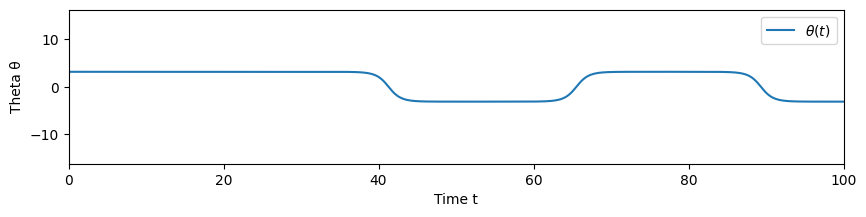

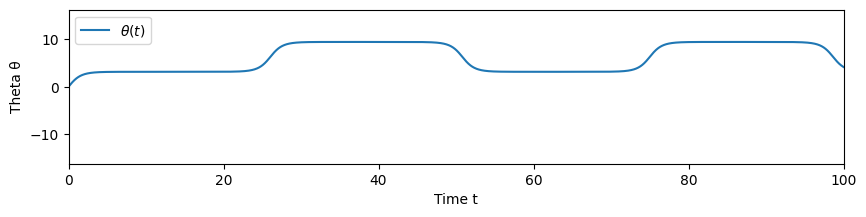

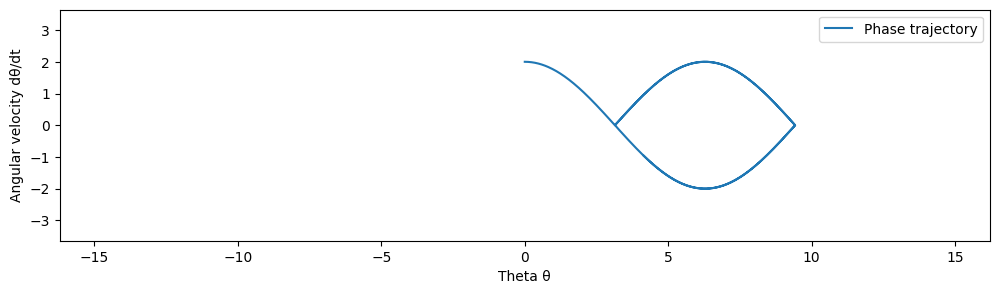

In [ ]:
#case 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import math

omega0 = 1.0
T = 100

def pendulum(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -omega0**2 * np.sin(theta)
    return [dtheta_dt, domega_dt]

y0 = [math.pi, 0.0]

sol = solve_ivp(pendulum, [0, T], y0, method="DOP853", rtol=1e-9, atol=1e-9, dense_output=True)

t_vals = np.linspace(0, T, 5000)
theta_vals, omega_vals = sol.sol(t_vals)

plt.figure(figsize=(10,2))
plt.plot(t_vals, theta_vals, label=r'$\theta(t)$')
plt.xlim([0, 100])
plt.ylim([-5*np.pi-0.5, 5*np.pi+0.5])
plt.xlabel("Time t")
plt.ylabel("Theta θ")
plt.legend()
plt.show()

#case 2
y0 = [0.0, 2.0]

sol = solve_ivp(pendulum, [0, T], y0, method="DOP853", rtol=1e-9, atol=1e-9, dense_output=True)

t_vals = np.linspace(0, T, 5000)
theta_vals, omega_vals = sol.sol(t_vals)

plt.figure(figsize=(10,2))
plt.plot(t_vals, theta_vals, label=r'$\theta(t)$')
plt.xlim([0, 100])
plt.ylim([-5*np.pi-0.5, 5*np.pi+0.5])
plt.xlabel("Time t")
plt.ylabel("Theta θ")
plt.legend()
plt.show()

plt.figure(figsize=(12,3))
plt.plot(theta_vals, omega_vals, label="Phase trajectory")
plt.xlim([-5*np.pi-0.5, 5*np.pi+0.5])
plt.ylim([-np.pi-0.5, np.pi+0.5])
plt.xlabel("Theta θ")
plt.ylabel("Angular velocity dθ/dt")
plt.legend()
plt.show()



## **Problem 3:**

Debug and edit the code cell included below to plot the phase portrait on constant energy curves.

1. **[Code cell(s)]:** Debug the code cell below. Incorporate the details from the **_Constant energy curves_** item in the introduction. Add a comment at the end of each line explaining what that line does.
2. **[Code cell(s)]:** Combine the energy contours with your `theta_0 = 0`; `ang_vel_0=2` solution.
3. **[Text cell]:** Comment on the result.


In [ ]:
import numpy as np
import matplotlib.piplot as plt

def rigid_pendulum_energy(theta, ang_vel, omega_0=1, moment_of_inertia=1)
  energy = 0.5 * moment_of_inertia * ang_vel ** 2 + moment_of_inerti * omega_0 ** 2 * (1-np.cos(theta))
return energy

theta_list = np.linspace(-5 * np.pi, 5 * np.pi, 300)
ang_vel_list = np.linspace(- np.pi,  np.pi, 100)
theta_mesh, ang_vel_mesh = np.meshgrid(theta_list, ang_vel_list)
energy_mesh = rigid_pendulum_energy(theta_mesh, ang_vel_mesh)
low_levels = np.linespace(0, 2, 5, endpoint=False)
high_levels = np.linspace(2, energy_mesh.max(), 15)
levels = np.concatenate((low_levels, high_levels))

x_lim = [-5 * np.pi - 0.5, 5 * np.pi + 0.5]
y_lim = [- np.pi - 0.5, np.pi + 0.5]
x_ticks = np.pi * [-4, -2, 0, 2, 4]
x_tick_labels = ['$-4\\pi$', '$-2\\pi$', '$0$', '$2\\pi$', '$4\\pi$']
plt.figure(figsize={12, 3})
contours = plt.contourf(theta_mesh, ang_vel_mesh, energy_mesh, levels=30, cmap='viridis')
plt.contour(theta_mesh, ang_vel_mesh, energy_mesh, levels=levels, colors='white', linewidths=0.5)
# plt.plot(theta_plot[0], ang_vel_plot[1], label='rigid pendulum', color='red', linewidth=0.5)
plt.colorbar(contours., label='energy')
plt.xlabel('$\\theta$')
plt.ylabel('$d\\theta/dt$')
plt.xticks(x_ticks, x_tick_labels)
plt.yticks(range(-3,4,1))
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

SyntaxError: expected ':' (ipython-input-1704192596.py, line 4)

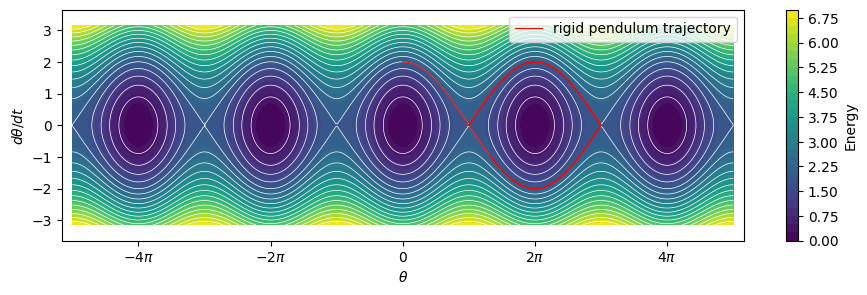

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # fixed typo: was matplotlib.piplot

# Define energy function for the rigid pendulum
def rigid_pendulum_energy(theta, ang_vel, omega_0=1, moment_of_inertia=1):
    # theta = angle, ang_vel = angular velocity
    # Energy = kinetic + potential
    energy = 0.5 * moment_of_inertia * ang_vel**2 + moment_of_inertia * omega_0**2 * (1 - np.cos(theta))
    return energy  # return total energy

# Create mesh grid of theta and angular velocity values
theta_list = np.linspace(-5 * np.pi, 5 * np.pi, 300)  # theta range
ang_vel_list = np.linspace(-np.pi, np.pi, 100)        # angular velocity range
theta_mesh, ang_vel_mesh = np.meshgrid(theta_list, ang_vel_list)  # 2D grid
energy_mesh = rigid_pendulum_energy(theta_mesh, ang_vel_mesh)     # energy on grid

# Define contour levels (low & high energy curves)
low_levels = np.linspace(0, 2, 5, endpoint=False)                # fine spacing for small energies
high_levels = np.linspace(2, energy_mesh.max(), 15)              # coarser spacing for higher energies
levels = np.concatenate((low_levels, high_levels))               # combine into one array

# Axis limits and ticks
x_lim = [-5 * np.pi - 0.5, 5 * np.pi + 0.5]                      # theta range
y_lim = [-np.pi - 0.5, np.pi + 0.5]                              # angular velocity range
x_ticks = np.pi * np.array([-4, -2, 0, 2, 4])                    # multiples of pi
x_tick_labels = ['$-4\\pi$', '$-2\\pi$', '$0$', '$2\\pi$', '$4\\pi$']  # tick labels

# Plot contour map of energy
plt.figure(figsize=(11,3))                                       # fixed from {12,3} to (11,3)
contours = plt.contourf(theta_mesh, ang_vel_mesh, energy_mesh, levels=30, cmap='viridis')  # filled contours
plt.contour(theta_mesh, ang_vel_mesh, energy_mesh, levels=levels, colors='white', linewidths=0.5)  # contour lines

# Overlay phase trajectory from Case 2 (θ0=0, ω0=2)
# -- assume theta_vals, omega_vals already computed using solve_ivp earlier
plt.plot(theta_vals, omega_vals, label='rigid pendulum trajectory', color='red', linewidth=0.8)

# Add colorbar and labels
plt.colorbar(contours, label='Energy')                           # fixed typo: was contours.
plt.xlabel('$\\theta$')
plt.ylabel('$d\\theta/dt$')
plt.xticks(x_ticks, x_tick_labels)                              # custom tick labels
plt.yticks(range(-3, 4, 1))                                     # -3 to 3 step 1
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.legend()
plt.show()


The plot shows the phase portrait of the rigid pendulum superimposed on constant energy contours.  

 The **background contours** represent curves of constant total energy (kinetic + potential).

 The **red trajectory** corresponds to the case $\theta_0 = 0$, $\dot{\theta}(0) = 2$, and lies along one of these contours, confirming that energy is conserved in the undriven pendulum.  

 Closed contours correspond to oscillatory motion (pendulum swinging back and forth).
   
Open contours correspond to rotational motion, where the pendulum has enough energy to rotate continuously.  

 The numerical trajectory correctly follows the expected energy contour, validating both the simulation and the conservation of energy in this system.  
